# Arginine-glutamic acid dipeptide repeats (RERE)

The Arginine-glutamic acid dipeptide repeats (RERE) RERE gene encodes a nuclear receptor coregulator that positively regulates retinoic acid signaling [Fregeau et al., 2016](https://pubmed.ncbi.nlm.nih.gov/27087320/). A high percentage of RERE pathogenic variants affect a 21 amino acid (amino acids 1425–1445), histidine-rich region of the Atrophin-1 domain [Jordan et al., 2018](https://pubmed.ncbi.nlm.nih.gov/29330883/). The authors noted that Of the 19 individuals with NEDBEH described here and by Fregeau et al. (2016), nine (47%) carry sequence variants that affect a histidine-rich region of the Atrophin-1 domain that spans 21 amino acids (1425– 1445). The amino acid sequence in this region is 100% conserved down to Xenopus and zebrafish, but the functional significance of this domain is currently unknown.

Let us try to reproduce Table 3 of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5903952/
To do this, we will want to use (for instance)  Abnormal brain morphology HP:0012443 for "Brain anomalies", and use the MTC feature that tests only one term at a time (this will mean no Bonferroni is applied, just as in the original publication).  

Take a look at "analysis_config.specify_terms_strategy()"
Do this once for each of the items in Table 3 with the appropriate HPO term.
Presumably, we will also not achieve statistical significance, but if we get a comparable result as the authors, this will be fine.

As a stretch goal, we can figure out how to do "Number of defects per individual"


In [1]:
import gpsea
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.preprocessing import load_phenopacket_folder
from gpsea.preprocessing import configure_caching_cohort_creator
from gpsea.model import FeatureType, VariantEffect
from gpsea.view import CohortViewable
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
import hpotk
from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


In [2]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'RERE'
phenopacket_store_release = '0.1.19'
RERE_MANE_transcript = 'NM_012102.4'
RERE_protein_id = "NP_036234.3"

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Patients Created: 100%|██████████| 19/19 [00:34<00:00,  1.81s/it]
Validated under none policy
No errors or warnings were found


In [3]:
from IPython.display import display, HTML
from gpsea.view import CohortViewable

cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=RERE_MANE_transcript)

display(HTML(html))

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,17
Intellectual disability,HP:0001249,17
Autistic behavior,HP:0000729,12
Hypotonia,HP:0001252,8
Thin corpus callosum,HP:0033725,7
Reduced cerebral white matter volume,HP:0034295,6
Ventricular septal defect,HP:0001629,5
Short stature,HP:0004322,5
Coloboma,HP:0000589,4
Ventriculomegaly,HP:0002119,4


In [4]:
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(RERE_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(RERE_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [5]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 90,1
BAH,domain,103 - 283,0
ELM2,domain,284 - 387,1
SANT,domain,391 - 443,0
Disordered,region,464 - 495,1
Disordered,region,542 - 1133,3
Disordered,region,1162 - 1246,0


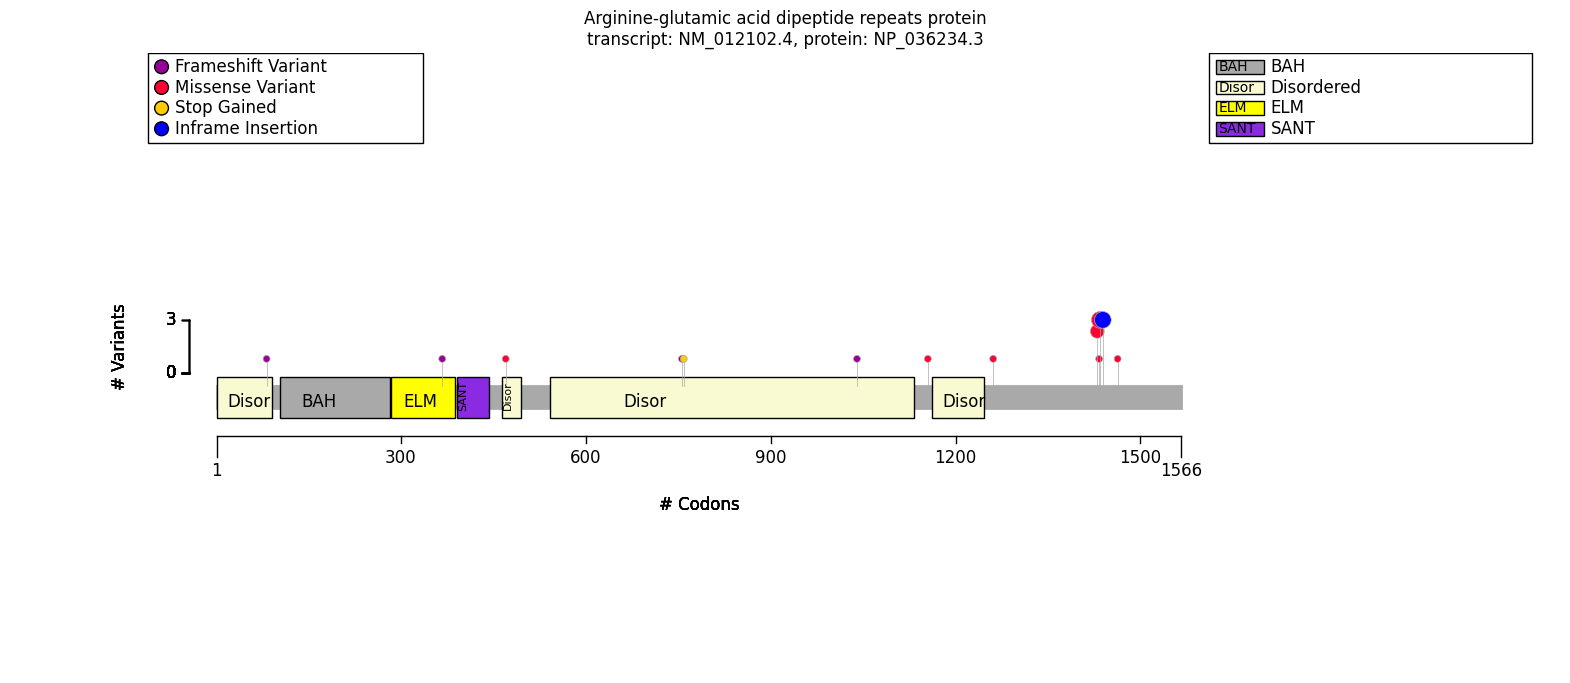

In [6]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);

In [7]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.hpo_mtc_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, ProteinPredicates

is_framshift = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=RERE_MANE_transcript)
frameshift = analysis.compare_hpo_vs_genotype(is_framshift)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_012102.4                   Yes             No  \
                                                  Count Percent  Count   
Thin corpus callosum [HP:0033725]                   0/2      0%    7/7   
Reduced cerebral white matter volume [HP:0034295]   0/2      0%    6/6   
Broad eyebrow [HP:0011229]                          2/4     50%   0/14   
Macrocephaly [HP:0000256]                           2/4     50%   0/13   
Poor suck [HP:0002033]                              2/3     67%    0/7   
Downslanted palpebral fissures [HP:0000494]         2/4     50%   1/14   
Short stature [HP:0004322]                          0/3      0%    5/8   
Hypertelorism [HP:0000316]                          2/4     50%   2/14   
Intellectual disability [HP:0001249]                3/4     75%  13/13   
Global developmental delay [HP:0001263]             3/4     75%  13/13   
Ventriculomegaly [HP:0002119]                       0/2      0%    4/7   
Cerebellar vermis hypoplasia [HP:0001320]           0/3      0%    3/7   
Intrauterine growth retardation [HP:0001511]        0/3      0%    3/8   
Sensorineural hearing impairment [HP:0000407]       0/4      0%   4/13   
Coloboma [HP:0000589]                               0/4      0%   4/14   
Hypotonia [HP:0001252]                              1/4     25%   7/14   
Hypospadias [HP:0000047]                            0/2      0%    2/6   
Deeply set eye [HP:0000490]                         0/4      0%   3/14   
Choanal atresia [HP:0000453]                        0/4      0%   3/14   
Patent foramen ovale [HP:0001655]                   0/3      0%    2/8   
Clinodactyly of the 5th finger [HP:0004209]         1/3     33%    2/8   
Epicanthus [HP:0000286]                             1/4     25%   2/14   
Vesicoureteral reflux [HP:0000076]                  0/4      0%   3/14   
Ventricular septal defect [HP:0001629]              1/3     33%    4/8   
Microphthalmia [HP:0000568]                         0/3      0%    2/7   
Single transverse palmar crease [HP:0000954]        0/3      0%    2/7   
Scoliosis [HP:0002650]                              1/4     25%   2/14   
Broad thumb [HP:0011304]                            1/3     33%    2/8   

FRAMESHIFT_VARIANT on NM_012102.4                                    \
                                                  Percent   p value   
Thin corpus callosum [HP:0033725]                    100%  0.027778   
Reduced cerebral white matter volume [HP:0034295]    100%  0.035714   
Broad eyebrow [HP:0011229]                             0%  0.039216   
Macrocephaly [HP:0000256]                              0%  0.044118   
Poor suck [HP:0002033]                                 0%  0.066667   
Downslanted palpebral fissures [HP:0000494]            7%  0.107843   
Short stature [HP:0004322]                            62%  0.181818   
Hypertelorism [HP:0000316]                            14%  0.197059   
Intellectual disability [HP:0001249]                 100%  0.235294   
Global developmental delay [HP:0001263]              100%  0.235294   
Ventriculomegaly [HP:0002119]                         57%  0.444444   
Cerebellar vermis hypoplasia [HP:0001320]             43%  0.475000   
Intrauterine growth retardation [HP:0001511]          38%  0.490909   
Sensorineural hearing impairment [HP:0000407]         31%  0.519328   
Coloboma [HP:0000589]                                 29%  0.524183   
Hypotonia [HP:0001252]                                50%  0.588235   
Hypospadias [HP:0000047]                              33%  1.000000   
Deeply set eye [HP:0000490]                           21%  1.000000   
Choanal atresia [HP:0000453]                          21%  1.000000   
Patent foramen ovale [HP:0001655]                     25%  1.000000   
Clinodactyly of the 5th finger [HP:0004209]           25%  1.000000   
Epicanthus [HP:0000286]                               14%  1.000000   
Vesicoureteral reflux [HP:0000076]                    21%  1.000000   
Vent

In [9]:
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=RERE_MANE_transcript)
missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_012102.4                      Yes            No  \
                                                   Count Percent Count   
Choanal atresia [HP:0000453]                        0/10      0%   3/8   
Thin corpus callosum [HP:0033725]                    6/6    100%   1/3   
Reduced cerebral white matter volume [HP:0034295]    5/5    100%   1/3   
Macrocephaly [HP:0000256]                           0/10      0%   2/7   
Cerebellar vermis hypoplasia [HP:0001320]            3/5     60%   0/5   
Broad eyebrow [HP:0011229]                          0/10      0%   2/8   
Hypotonia [HP:0001252]                              6/10     60%   2/8   
Deeply set eye [HP:0000490]                         3/10     30%   0/8   
Vesicoureteral reflux [HP:0000076]                  3/10     30%   0/8   
Hypertelorism [HP:0000316]                          1/10     10%   3/8   
Coloboma [HP:0000589]                               1/10     10%   3/8   
Intellectual disability [HP:0001249]               10/10    100%   6/7   
Global developmental delay [HP:0001263]            10/10    100%   6/7   
Poor suck [HP:0002033]                               0/5      0%   2/5   
Microphthalmia [HP:0000568]                          2/5     40%   0/5   
Single transverse palmar crease [HP:0000954]         2/5     40%   0/5   
Low-set ears [HP:0000369]                            0/5      0%   2/6   
High palate [HP:0000218]                            2/10     20%   0/8   
Preauricular pit [HP:0004467]                       2/10     20%   0/8   
Clinodactyly of the 5th finger [HP:0004209]          1/6     17%   2/5   
Downslanted palpebral fissures [HP:0000494]         1/10     10%   2/8   
Scoliosis [HP:0002650]                              1/10     10%   2/8   
Sensorineural hearing impairment [HP:0000407]       3/10     30%   1/7   
Intrauterine growth retardation [HP:0001511]         1/5     20%   2/6   
Short stature [HP:0004322]                           3/6     50%   2/5   
Epicanthus [HP:0000286]                             2/10     20%   1/8   
Ventricular septal defect [HP:0001629]               2/5     40%   3/6   
Ventriculomegaly [HP:0002119]                        2/5     40%   2/4   
Broad thumb [HP:0011304]                             2/6     33%   1/5   

MISSENSE_VARIANT on NM_012102.4                                      \
                                                  Percent   p value   
Choanal atresia [HP:0000453]                          38%  0.068627   
Thin corpus callosum [HP:0033725]                     33%  0.083333   
Reduced cerebral white matter volume [HP:0034295]     33%  0.107143   
Macrocephaly [HP:0000256]                             29%  0.154412   
Cerebellar vermis hypoplasia [HP:0001320]              0%  0.166667   
Broad eyebrow [HP:0011229]                            25%  0.183007   
Hypotonia [HP:0001252]                                25%  0.187988   
Deeply set eye [HP:0000490]                            0%  0.215686   
Vesicoureteral reflux [HP:0000076]                     0%  0.215686   
Hypertelorism [HP:0000316]                            38%  0.274510   
Coloboma [HP:0000589]                                 38%  0.274510   
Intellectual disability [HP:0001249]                  86%  0.411765   
Global developmental delay [HP:0001263]               86%  0.411765   
Poor suck [HP:0002033]                                40%  0.444444   
Microphthalmia [HP:0000568]                            0%  0.444444   
Single transverse palmar crease [HP:0000954]           0%  0.444444   
Low-set ears [HP:0000369]                             33%  0.454545   
High palate [HP:0000218]                               0%  0.477124   
Preauricular pit [HP:0004467]                          0%  0.477124   
Clinodactyly of the 5th finger [HP:0004209]           40%  0.545455   
Downslanted palpebral fissures [HP:0000494]           25%  0.558824   
Scoliosis [HP:0002650]                                25%  0.558824   
S

In [10]:
is_region = VariantPredicates.region(Region(542, 1133), tx_id=RERE_MANE_transcript)

region = analysis.compare_hpo_vs_genotype(is_region)
region.summarize(hpo, PatientCategories.YES)

variant affects aminoacid(s) between 542 and 1133 on protein encoded by transcript NM_012102.4   Yes  \
                                                                                               Count   
Macrocephaly [HP:0000256]                                                                        2/2   
Broad eyebrow [HP:0011229]                                                                       2/3   
Thin corpus callosum [HP:0033725]                                                                0/1   
Reduced cerebral white matter volume [HP:0034295]                                                0/1   
Scoliosis [HP:0002650]                                                                           1/3   
Short stature [HP:0004322]                                                                       0/2   
Cerebellar vermis hypoplasia [HP:0001320]                                                        0/3   
Intrauterine growth retardation [HP:0001511]                                                     0/3   
Clinodactyly of the 5th finger [HP:0004209]                                                      0/3   
Sensorineural hearing impairment [HP:0000407]                                                    0/3   
Hypospadias [HP:0000047]                                                                         0/1   
Intellectual disability [HP:0001249]                                                             3/3   
Attention deficit hyperactivity disorder [HP:00...                                               0/3   
Global developmental delay [HP:0001263]                                                          3/3   
Deeply set eye [HP:0000490]                                                                      0/3   
Choanal atresia [HP:0000453]                                                                     0/3   
Patent foramen ovale [HP:0001655]                                                                0/3   
Hypotonia [HP:0001252]                                                                           1/3   
Epicanthus [HP:0000286]                                                                          0/3   
Downslanted palpebral fissures [HP:0000494]                                                      0/3   
Hypertelorism [HP:0000316]                                                                       1/3   
Vesicoureteral reflux [HP:0000076]                                                               0/3   
Coloboma [HP:0000589]                                                                            0/3   
Ventricular septal defect [HP:0001629]                                                           1/3   
Microphthalmia [HP:0000568]                                                                      0/3   
Single transverse palmar crease [HP:0000954]                                                     0/3   
Ventriculomegaly [HP:0002119]                                                                    0/1   
Spastic tetraparesis [HP:0001285]                                                                0/3   
Broad thumb [HP:0011304]                                                                         1/3   

variant affects aminoacid(s) between 542 and 1133 on protein encoded by transcript NM_012102.4          \
                                                                                               Percent   
Macrocephaly [HP:0000256]                                                                         100%   
Broad eyebrow [HP:0011229]                                                                         67%   
Thin corpus callosum [HP:0033725]                                                                   0%   
Reduced cerebral white matter volume [HP:0034295]                                                   0%   
Scoliosis [HP:0002650]                                                                             33%   
Short stature [HP:0004322]       